In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA Accessing

In [3]:
# import the dataset into dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train_len = len(train)
test_len = len(test)

In [5]:
train_len

891

In [6]:
test_len

418

In [7]:
# join the train and test dataset for accessing and cleaning
df = pd.concat([train, test], ignore_index = True)

In [8]:
# check the top five rows of the dataframe
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
# check the summary of the datarame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [10]:
# check the statistical summary of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
# check for missing values
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

0

# DATA CLEANING

In [30]:
# fill the missing values in age colums with mean
age_mean=round(   df["Age"].mean(), 0)
df.Age.fillna(age_mean, inplace=True)

In [14]:
# fill the missing values in FARE colums with mean
fare_mean=round(   df["Fare"].mean(), 0)
df.Fare.fillna(fare_mean, inplace=True)

In [15]:
# fill the missing values in EMBARKED colums with mMODE
embarked_mode=df["Embarked"].mode()[0]
df.Embarked.fillna(embarked_mode, inplace=True)

In [16]:
# drop the cabin column because missing values are more than 70%
df.drop(columns=["Cabin"], inplace=True)

In [17]:
# extract passengers title from their name
title_split = lambda x: x.split()[1].strip(".")

In [18]:
# new column
df["Title"] = df["Name"].apply(title_split)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,y
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr


In [20]:
df["Title"].value_counts()

Mr              736
Miss            256
Mrs             191
Master           59
Dr                8
Rev               8
y                 8
Planke,           4
Col               4
Impe,             3
Billiard,         3
Mlle              2
Carlo,            2
Ms                2
Major             2
Gordon,           2
Messemaeker,      2
Velde,            1
Palmquist,        1
Khalil,           1
Cruyssen,         1
Melkebeke,        1
Jonkheer          1
Shawah,           1
the               1
Walle,            1
Capt              1
Don               1
Pelsmaeker,       1
Mme               1
Steen,            1
der               1
Mulder,           1
Brito,            1
Name: Title, dtype: int64

In [21]:
title_list = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev"]

In [22]:
for title in df["Title"]:
    if title not in title_list:
        df["Title"].replace(title, "Mr", inplace=True)

In [23]:
df["Title"].value_counts()

Mr        787
Miss      256
Mrs       191
Master     59
Rev         8
Dr          8
Name: Title, dtype: int64

# Exploration data analysis (EDA)
Exploration data analysis
1. uni variate analysis: comparing column with itself
2. bi-variate analysis: comparing two columns from a dataframe
3. multi-variate analysis: comparing more than two columns in a dataframe

## uni variate 
for the test column: make a count
for the number column: show the distribution

In [ ]:
class_count = df.Pclass.value_counts()
class_count.index = ["third class", "frist class", "second class"]
class_count

In [ ]:
# using pandas plot for the analysis above make sure analysis is either on series or dataframe
class_count.plot(kind="bar", color=["red", "green", "yellow"])
plt.title("count of class")
plt.xlabel("class of cabin")
plt.ylabel("count")
plt.xticks(rotation =35, color ="red")
plt.yticks(rotation = 35, color ="green")
plt.show()

In [ ]:
df

In [ ]:
Sex_count =df.Sex.value_counts()

In [ ]:
Sex_count

In [ ]:
# MATPLOT illustration

Sex_count =df["Sex"].value_counts()
plt.bar(x=Sex_count.index, height=Sex_count.values, width = 0.1)
plt.title("count of sex")
plt.xlabel("Sex")
plt.ylabel("count")
plt.xticks(rotation =35, color ="red")
plt.yticks(rotation = 35, color ="green")
plt.show()

In [ ]:
#

In [ ]:
df['Age'].plot(kind = 'box')

In [ ]:
df["Age"].plot(kind ="hist")

# Bi Variate
category vs category

In [ ]:
# Bi variate analysis

dead = df.query("Survived == 0")["Pclass"].value_counts()
alive = df.query("Survived ==1")["Pclass"].value_counts()
i =pd.concat([dead,alive], axis =1, keys=["dead", "alive"])
i.plot(kind="bar")

plt.title("count of Pclass")
plt.xlabel("Pclass")
plt.ylabel("count")
plt.xticks(rotation =35, color ="red")
plt.yticks(rotation = 35, color ="green")
plt.show()

In [ ]:
def barplot(col):
    dead = df.query("Survived == 0")[col].value_counts()
    alive = df.query("Survived ==1")[col].value_counts()
    i =pd.concat([dead,alive], axis =1, keys=["dead", "alive"])
    i.plot(kind="bar")
    plt.title(f"count of [col]")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    plt.xticks(rotation =35, color ="red")
    plt.yticks(rotation = 35, color ="green")
    plt.show()

In [ ]:
barplot("Title")

In [ ]:
barplot("Sex")

In [ ]:
df

In [ ]:
barplot("Embarked")

#### Category and Numerical

In [ ]:
facet =sns.FacetGrid(data=df, hue="survived_name", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
plt.legend()
plt.xlim(1,80)

In [ ]:
#creating another column for when survive is 0 and 1
df.loc[df["Survived"]==0.0, "survived_name"]="dead"
df.loc[df["Survived"]==1.0, "survived_name"]= "alive"

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr


In [26]:
def cat_num(cat, num):
    facet =sns.FacetGrid(data=df, hue=cat, aspect=4)
    facet.map(sns.kdeplot, num, shade=True)
    plt.legend()
    plt.xlim(1,80)

In [27]:
cat_num("survived_name", "Age")

KeyError: 'survived_name'

In [ ]:
cat_num("Pclass", "Age")

In [ ]:
sns.boxplot(data=df, x="Pclass", y="Age")

#### Num vs Num

<AxesSubplot:xlabel='Age', ylabel='Fare'>

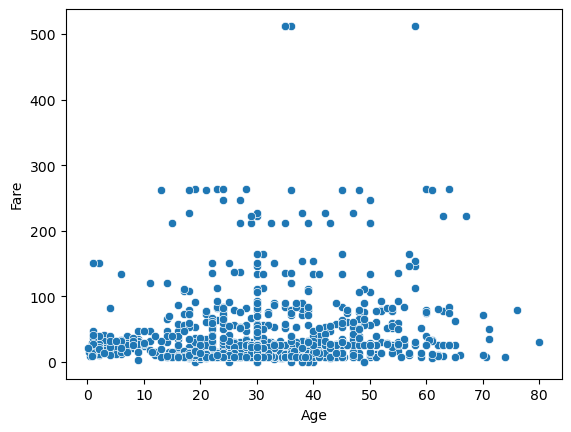

In [29]:
sns.scatterplot(data=df, x="Age", y="Fare")